In [30]:
import gym
import gym_classics
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import deque
warnings.filterwarnings("ignore")

In [31]:
env = gym.make("DynaMaze-v0")

In [49]:
def qlearning(env, Q, params):
    env.seed(0)
    tot_steps = 0
    done = False
    state = env.reset()
    while not done:
        action = 0
        if np.random.binomial(1, params["epsilon"]) == 1:
            action = np.random.choice(range(4))
        else:
            values_ = Q[state, :]
            action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
        next_state, reward, done, info = env.step(action)
        target = params["gamma"] * np.max(Q[next_state, :])
        if done: target = 0
        td_error = reward + target -  Q[state, action]
        Q[state, action] += params["alpha"] * td_error

        state = next_state
        tot_steps += 1
        
    return tot_steps

In [50]:
params = {
    "alpha": 0.1,
    "gamma": 0.95,
    "epsilon": 0.1,
}

EPISODES = 50
steps_q = np.zeros(EPISODES)
Q = np.zeros((9*6, 4))
for i in range(EPISODES):
    steps_q[i] = qlearning(env, Q, params)

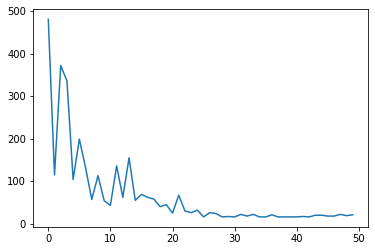

In [51]:
plt.plot(steps_q)
plt.show()

In [56]:
def dynaq(env, Q, params, n=2):
    env.seed(0)
    tot_steps = 0
    done = False
    state = env.reset()
    model = {}
    while not done:
        action = 0
        if np.random.binomial(1, params["epsilon"]) == 1:
            action = np.random.choice(range(4))
        else:
            values_ = Q[state, :]
            action = np.random.choice([action_ for action_, value_ in enumerate(values_) if value_ == np.max(values_)])
        next_state, reward, done, info = env.step(action)
        
        if state not in model:
            model[state] = {}
        model[state][action] = (next_state, reward)
        
        target = params["gamma"] * np.max(Q[next_state, :])
        if done: target = 0
        td_error = reward + target -  Q[state, action]
        Q[state, action] += params["alpha"] * td_error

        state = next_state
        tot_steps += 1
        
        for _ in range(n):
            tmp_state = random.choice(list(model.keys()))
            tmp_action = random.choice(list(model[tmp_state].keys()))
            tmp_next_state, tmp_reward = model[tmp_state][tmp_action]
            target = params["gamma"] * np.max(Q[tmp_next_state, :])
            td_error = tmp_reward + target -  Q[tmp_state, tmp_action]
            Q[tmp_state, tmp_action] += params["alpha"] * td_error

    return tot_steps

In [57]:
params = {
    "alpha": 0.1,
    "gamma": 0.95,
    "epsilon": 0.1,
}

EPISODES = 50
steps_dynaq = np.zeros(EPISODES)
Q = np.zeros((9*6, 4))
for i in range(EPISODES):
    steps_dynaq[i] = dynaq(env, Q, params)

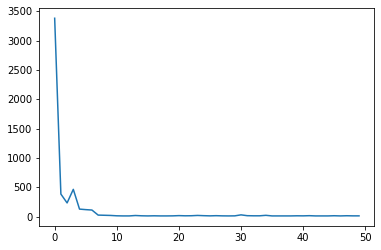

In [58]:
plt.plot(steps_dynaq)
plt.show()

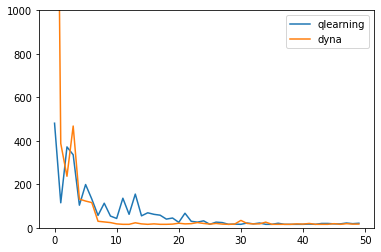

In [60]:
plt.plot(steps_q, label="qlearning")
plt.plot(steps_dynaq, label="dyna")
plt.ylim([0, 1000])
plt.legend()
plt.show()